# PROYECTO SPRINT 11

In [2919]:
# Importación de librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math as mth

In [2920]:
# Lectura de archivo
data = pd.read_csv('logs_exp_us.csv', sep='\t')
data.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


## 1. Preparación de datos

In [2921]:
# Revisar tipos de datos y datos ausentes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


No hay datos ausentes

In [2922]:
# Verificación de filas duplicadas
data.duplicated().sum()

413

Existen 413 filas duplicadas

In [2923]:
duplicated_rows = data[data.duplicated()]
duplicated_rows.head(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
453,MainScreenAppear,5613408041324010552,1564474784,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3573,MainScreenAppear,434103746454591587,1564628377,248
4076,MainScreenAppear,3761373764179762633,1564631266,247
4803,MainScreenAppear,2835328739789306622,1564634641,248


Las filas duplicadas, corresponden a un 0,17% de las filas del dataframe por lo cual no hay relevancia alguna si se eliminan. 

In [2924]:
# Eliminación de filas duplicadas
data = data.drop_duplicates()
data.duplicated().sum()

0

In [2925]:
# Cambio de nombre de columnas
data = data.rename(columns = {'EventName': 'event_name', 'DeviceIDHash':'user_id', 'EventTimestamp':'event_time', 'ExpId':'exp_id'})

# Convertir la columna event_time a tipo datetime
data['event_time'] = pd.to_datetime(data['event_time'], unit='s')

data.head(5)

,event_name,user_id,event_time,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248


In [2926]:
# Crear columna event_date solo con la fecha del evento
data['event_date'] =data['event_time'].dt.date
data.head(5)

,event_name,user_id,event_time,exp_id,event_date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


## 2. Estudio y comprobación de datos

### 2.1 ¿Cuántos eventos hay en los registros?

In [2927]:
# Número de eventos
print(f"Eventos totales: {len(data)}")

Eventos totales: 243713


In [2928]:
# Número de eventos únicos
print(f"Eventos únicos: {data['event_time'].nunique()}")

Eventos únicos: 176654


### 2.2 ¿Cuántos usuarios hay en los registros?

In [2929]:
print(f'Hay un total de: {data['user_id'].nunique()} usuari@s únicos')

Hay un total de: 7551 usuari@s únicos


### 2.3 ¿Cuál es el promedio de eventos por usuario?

In [2930]:
event_per_user = data.groupby('user_id')['event_name'].count().mean().round(2)
print(f" El promedio de eventos por usuario es de: {event_per_user}")

 El promedio de eventos por usuario es de: 32.28


### 2.4 ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [2931]:
# Primera fecha de evento x usuario
first_event = data['event_date'].min()

# Última fecha de evento x usuario
last_event = data['event_date'].max()

print(f"La fecha mínima es: {first_event}")
print(f"La fecha máxima es: {last_event}")


La fecha mínima es: 2019-07-25
La fecha máxima es: 2019-08-07


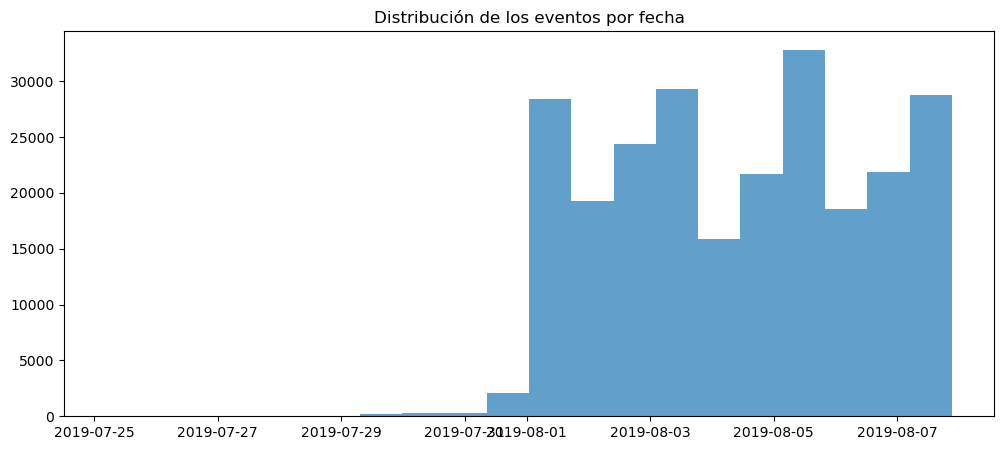

In [2932]:
# Distribución de la primera fecha de evento
data.hist(column = 'event_time',figsize=(12,5), bins=20, grid=False, alpha=0.7)
plt.title('Distribución de los eventos por fecha')
plt.show()

En la gráfica de distribución observamos un sesgo a la derecha, ya que la mayoría de los eventos ocurrieron entre el 1 de Agosto y el 7 de Agosto, por lo que nos concentraremos en trabajar solo con los eventos ocurridos entre este rango.

In [2933]:
data['event_date'] = pd.to_datetime(data['event_date'])
data_2 = data[data['event_date']>= '2019-08-01'].reset_index(drop=True)
data_2.head(5)

,event_name,user_id,event_time,exp_id,event_date
0,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01
1,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01
2,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01
3,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01
4,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01


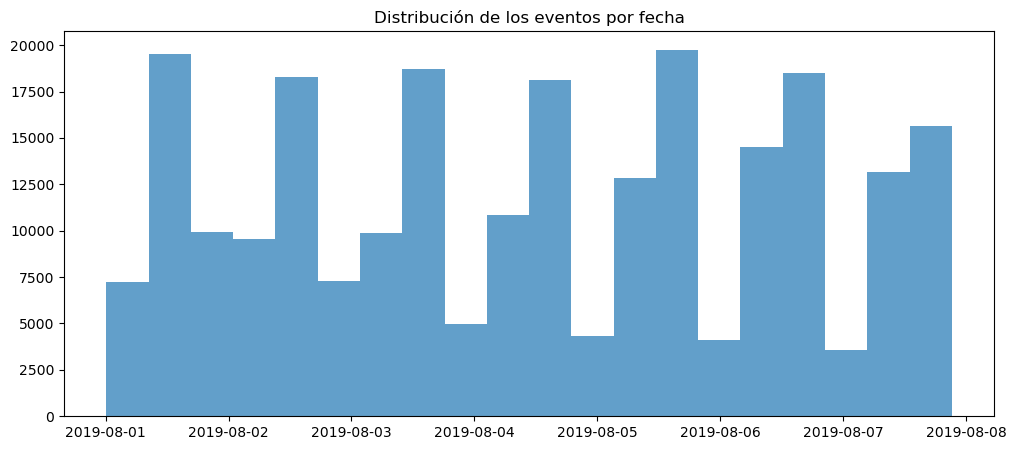

In [2934]:
data_2.hist(column = 'event_time',figsize=(12,5), bins=20, grid=False, alpha=0.7)
plt.title('Distribución de los eventos por fecha')
plt.show()

### 2.5 Número de eventos y usuarios perdidos

¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [2935]:
perdida = (1-len(data_2)/len(data))*100
print(f"Se perdió el {round(perdida, 2)} % de los registros")

Se perdió el 1.16 % de los registros


### 2.6 Usuarios de los tres grupos experimentales

In [2936]:
data_2.groupby('exp_id')['user_id'].count()

exp_id
246    79302
247    77022
248    84563
Name: user_id, dtype: int64

Los 3 grupos experimentales tienen datos de usuarios.

## 3. Embudo de eventos

### 3.1 Frecuencia de enventos

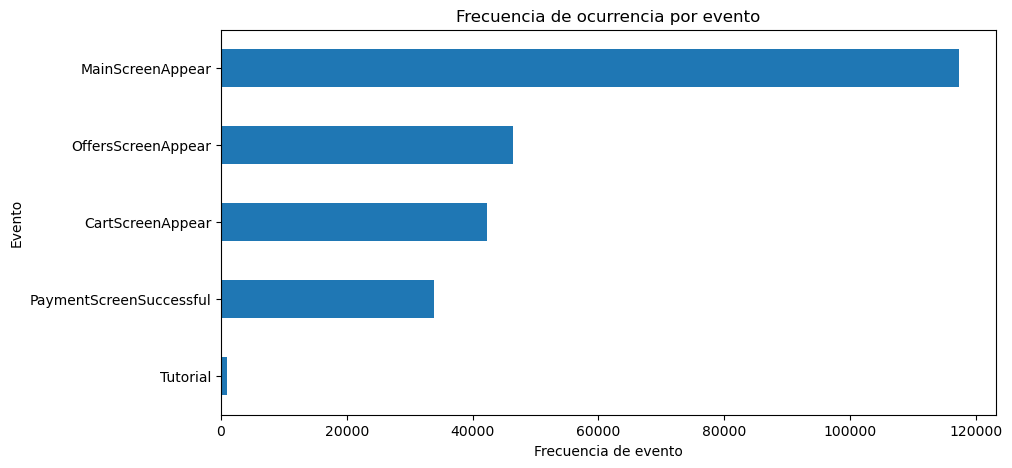

In [2937]:
# Agrupamos por evento y contamos el número de veces que ocurre
data_2.groupby('event_name')['user_id'].count().sort_values().plot(kind='barh',
                                                                    figsize=(10,5),
                                                                    xlabel = 'Frecuencia de evento',
                                                                    ylabel = 'Evento',
                                                                    title = 'Frecuencia de ocurrencia por evento')
plt.show()

### 3.2 Cantidad de usuarios únicos por evento

In [2938]:
# Creamos la variable user_count para almacenar el número de usuarios únicos por evento
users_count = data_2.groupby('event_name').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending=False)
users_count

,user_id
event_name,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


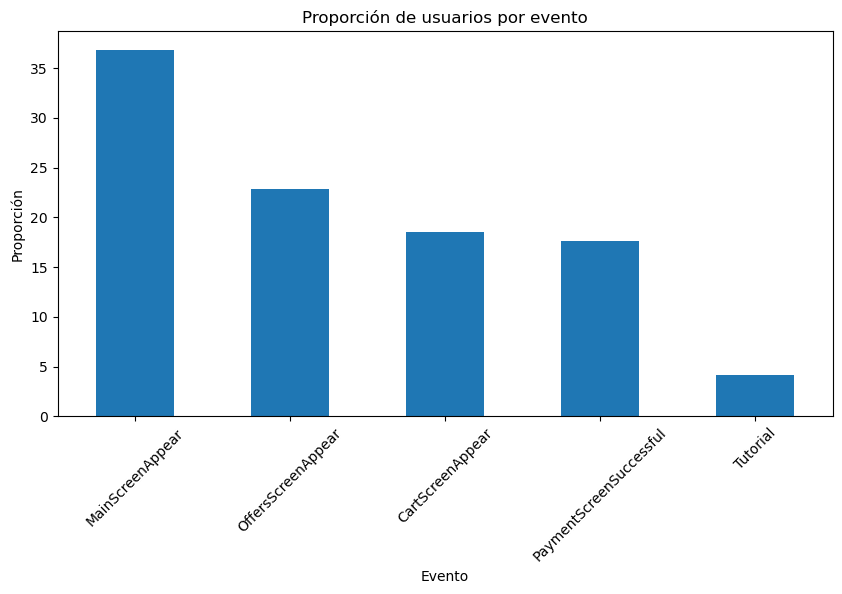

In [2939]:
# Proporción de usuarios únicos por evento
proportion = (users_count['user_id'] / users_count['user_id'].sum())*100
proportion.plot(kind='bar',
                figsize=(10,5),
                xlabel = 'Evento',
                ylabel = 'Proporción',
                title = 'Proporción de usuarios por evento',
                rot = 45)
plt.show()

### 3.3 ¿En qué orden crees que ocurrieron las acciones? 


A simple vista, pareciera que el orden de ocurrencia de los eventos es:
PÁGINA PRINCIPAL - PÁGINA DE OFERTAS - CHECK OUT (CARRITO DE COMPRAS) - PAGO EXITOSO - TUTORIAL

¿Todas son parte de una sola secuencia? 
No creo que todos eventos correspondan a una secuencia, por ejemplo, el tutorial propablemente es un evento que no todos lo hagan, o si lo hacen habrá algunos que lo hacen al inicio y otros al final. 

In [2940]:
users_count = users_count.reset_index()
event = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
users_count = users_count[users_count['event_name'].isin(event)]
users_count

,event_name,user_id
0,MainScreenAppear,7419
1,OffersScreenAppear,4593
2,CartScreenAppear,3734
3,PaymentScreenSuccessful,3539


### 3.4 Proporción de usuarios que pasan de una etapa a la siguiente

In [2941]:
# Para cada usuario buscamos el primer evento
users = data_2.pivot_table(
    index='user_id', 
    columns='event_name', 
    values='event_time',
    aggfunc='min')

users.head()

event_name,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
user_id,,,,,
6888746892508752,NaT,2019-08-06 14:06:34,NaT,NaT,NaT
6909561520679493,2019-08-06 18:52:58,2019-08-06 18:52:54,2019-08-06 18:53:04,2019-08-06 18:52:58,NaT
6922444491712477,2019-08-04 14:19:40,2019-08-04 14:19:33,2019-08-04 14:19:46,2019-08-04 14:19:40,NaT
7435777799948366,NaT,2019-08-05 08:06:34,NaT,NaT,NaT
7702139951469979,2019-08-02 14:28:45,2019-08-01 04:29:54,2019-08-01 04:29:56,2019-08-02 14:28:45,NaT


Cada fila de la tabla representa un usuario. Las columnas contienen la hora en que ocurrió por primera vez cada uno de los eventos. Los valores VaT representan la no ocurrencia del evento, por ejemplo, el usuario 6888746892508752 solo ingreso a la página principal y salió.

Además también se puede observar que hay alguno usuarios que no siguen la ruta de eventos prevista inicialmente, por ejemplo, el usuario 6922444491712477 visita la página de ofertas después de realizar el pago. Por lo anterior, realizaremos el embudo por secuencia de eventos.

In [2942]:
# Número de usuario en página principal
step_1 = ~users['MainScreenAppear'].isna()

# Número de usuarrios que de página principal pasaron a la página de ofertas
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])

# Número de usuarios que de la página de ofertas pasaron al carrito
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])

# Número de usuarios que del carrito pasaron a la página de pago exitoso
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])

step_5 = step_4 & (users['Tutorial'] > users['PaymentScreenSuccessful'])

main_screen = users[step_1].shape[0]
offer_screen = users[step_2].shape[0]
cart_screen = users[step_3].shape[0]
payment_screen = users[step_4].shape[0]
tutorial = users[step_5].shape[0]

print('Visitantes:', main_screen)
print('Visitantes página ofertas:', offer_screen)
print('Visitas al carrito:', cart_screen)
print('Pagado:', payment_screen)
print('Tutorial:', tutorial)


Visitantes: 7419
Visitantes página ofertas: 4201
Visitas al carrito: 1767
Pagado: 454
Tutorial: 1


Con la realización del embudo por secuencia, efectivamente nos damos cuenta que el tutorial no es un evento relevante dentro de la secuencia, puesto que tan solo 1 usuario de los 454 que pagaron lo vieron. Es un evento que se puede omitir dentro de los análisis.

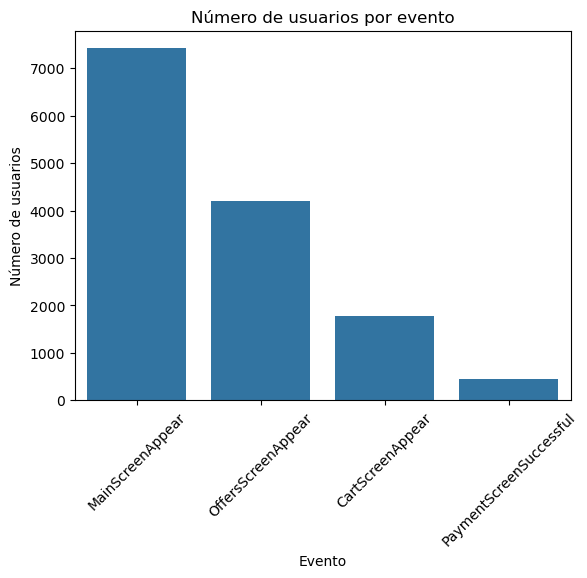

In [2943]:
ax = sns.barplot(x=['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful'],
                 y=[main_screen, offer_screen, cart_screen, payment_screen])
ax.set_title('Número de usuarios por evento')
ax.set_xlabel('Evento')
ax.set_ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

### 3.5 ¿En qué etapa se pierden más usuarios?

In [2944]:
offer_user = (offer_screen/main_screen) *100
cart_user = (cart_screen/offer_screen) *100
payment_user = (payment_screen/cart_screen) *100

print('Visitantes página ofertas:', offer_user)
print('Visitas al carrito:', cart_user)
print('Pagado:', payment_user)

Visitantes página ofertas: 56.62488205957676
Visitas al carrito: 42.06141394905975
Pagado: 25.693265421618563


La página de pago es donde más se pierden usuarios, solo 25 de 100 usuarios que entran a la página del carrito terminan con un pago exitoso.

### 3.6 ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

In [2945]:
funnel = (payment_screen/main_screen)*100
print(f'El {round(funnel, 2)} % de los usuarios que visitaron la página principal llegaron a la página de pago exitoso')

El 6.12 % de los usuarios que visitaron la página principal llegaron a la página de pago exitoso


## 4. Resultados del experimento

### 4.1 ¿Cuántos usuarios hay en cada grupo?

In [2946]:
# Agrupamos por exp_id y contamos el número de usuarios únicos
groups = data_2.groupby('exp_id')['user_id'].nunique().reset_index()
groups

,exp_id,user_id
0,246,2484
1,247,2513
2,248,2537


### 4.2 Diferencia estadísticamente significativa
Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

Vamos a probar la hipótesis que las proporciones de ambos grupos son iguales, por tanto:
H0 : Hay una diferencia significativa entre las proporciones de los grupos 246 y 247.
H1 : No hay razón para pensar que las proporciones de los grupos 246 y 247 son diferentes.

In [2947]:
# Creamos una matriz con valores únicos de parejas usuario-experimento y eliminamos usuarios duplicados
groups = data_2[['user_id', 'exp_id']].drop_duplicates()

# Creamos los grupos de control x experimento
control_1 = (groups[groups['exp_id'] == 246].agg({'user_id':'count'})).sum()
control_2 = (groups[groups['exp_id'] == 247].agg({'user_id':'count'})).sum()

# Crear columnas con valores binarios: 1 si el usuario hizo el evento, 0 si no
data_2['event'] = data_2['event_name'].apply(lambda x: 1 if x == 'PaymentScreenSuccessful' else 0)
    
# Almacenar en las variables successes_1 y successes_2 el número de usuarios que pasaron a la página de pagos exitoso
successes_1 = (data_2[data_2['exp_id'] == 246].groupby('user_id')['event'].max()).sum()
successes_2 = (data_2[data_2['exp_id'] == 247].groupby('user_id')['event'].max()).sum()

# Establecemos valor de significancia
alpha = 0.05

# proporción de éxito del grupo 246
p1 = successes_1/control_1

# proporción de éxito del grupo 247
p2 = successes_2/control_2

# proporción de éxito de ambos grupos
p_combined = (successes_1 + successes_2) / (control_1 + control_2)

# la diferencia entre las proporciones de los datasets
difference = p1 - p2

# Calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/control_1 + 1/control_2))

# establece la distribución normal estándar (media 0, desviación estándar 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)


if (p_value < alpha):
    print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones de los usuarios que pasaron a la página de pagos en ambos grupos")
else:
    print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios que pasaron a la página de pagos en ambos grupos son diferentes")

p-value:  0.11456679313141849
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios que pasaron a la página de pagos en ambos grupos son diferentes


### 4.3 Evento más popular

El evento más popular es aquel que haya ocurrido mayor número de veces, en nuestro caso es MainScreenAppear

#### 4.3.1 En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. 

In [2948]:
mainscreenapper = data_2[(data_2['event_name'] == 'MainScreenAppear') & (data_2['exp_id'].isin([246, 247]))]
mainscreen_users = mainscreenapper.groupby('exp_id')['user_id'].nunique().reset_index()
mainscreen_users.rename(columns = {'user_id':'users'}, inplace = True)
mainscreen_users

,exp_id,users
0,246,2450
1,247,2476


#### 4.3.2 Encuentra su proporción

In [2949]:
mainscreen_users['proportion'] = mainscreen_users['users'] / n_users
mainscreen_users.round(3)

,exp_id,users,proportion
0,246,2450,0.325
1,247,2476,0.329


#### 4.3.3 Comprueba si la diferencia entre los grupos es estadísticamente significativa.

In [2950]:
# Almacenamos en las variables successes_1 y successes_2 el número de usuarios únicos que llegaron a la página principal
successes_1 = mainscreen_users[mainscreen_users['exp_id'] == 246].iloc[0,1]
successes_2 = mainscreen_users[mainscreen_users['exp_id'] == 247].iloc[0,1]

# Establecemos nivel de significancia
alpha = 0.05 

p1 = mainscreen_users.iloc[0, 2] # Proporción de éxito grupo 246
p2 = mainscreen_users.iloc[1,2] # Proporción de éxito grupo 247
p_combined = (successes_1 + successes_2) / (control_1 + control_2) # Proporción de éxito en el dataset unido:
difference = p1 - p2 # Diferencia entre las proporciones de los datasets

# Calcula la estadística en desviaciones estándar de la distribución normal estándar
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * ((1/control_1)+ 1/control_2))

distr = st.norm(0, 1) # Se establece la distribución normal estándar (media 0, desviación estándar 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print('Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones de los usuarios de ambos grupos.')
else:
    print('No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.')

p-value:  0.30271960704545364
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


#### 4.3.4 Repite el procedimiento para todos los demás eventos

In [2951]:
def proportion_event_test(data_2, event_name, group_1, group_2):

    # Crear columnas con valores binarios: 1 si el usuario hizo el evento, 0 si no
    data_2['event'] = data_2['event_name'].apply(lambda x: 1 if x == event_name else 0)
    
    # Almacenar en las variables successes_1 y successes_2 el número de usuarios que pasaron a la página de pagos exitoso
    successes_1 = (data_2[data_2['exp_id'] == group_1].groupby('user_id')['event'].max()).sum()
    successes_2 = (data_2[data_2['exp_id'] == group_2].groupby('user_id')['event'].max()).sum()

    alpha = 0.05  # Establecemos valor de significancia
    p1 = successes_1/control_1 # Proporción de éxito del grupo_1
    p2 = successes_2/control_2 # Proporción de éxito del grupo_2
    p_combined = (successes_1 + successes_2) / (control_1 + control_2) # Proporción de éxito de ambos grupos
    difference = p1 - p2 # Diferencia entre las proporciones de los datasets

    # Calcula la estadística en desviaciones estándar de la distribución normal estándar
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/control_1 + 1/control_2))

    distr = st.norm(0, 1) # Se establece la distribución normal estándar (media 0, desviación estándar 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print(f'Evento: {event_name}') 
    print('p-value para los grupos', group_1, 'y', group_2,':', p_value)
    if (p_value < alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones de los usuarios de ambos grupos.")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.")

events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
for event in events:
    proportion_event_test(data_2, event, 246, 247)

Evento: MainScreenAppear
p-value para los grupos 246 y 247 : 0.7570597232046099
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 247 : 0.2480954578522181
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 247 : 0.22883372237997213
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 247 : 0.11456679313141849
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


#### 4.3.5 ¿Puedes confirmar que los grupos se dividieron correctamente?

Después de ejecutar la prueba en los 2 grupos de control para todos los eventos, se puede concluir que los grupos fueron divididos correctamente, puesto que no presentan una diferencia estadistica significativa.

### 4.4 Fuentes alteradas. 

#### 4.4.1 Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. 

In [2952]:
# Comparación de eventos entro los grupos 246 y 248
for event in events:
    proportion_event_test(data_2, event, 246, 248)

Evento: MainScreenAppear
p-value para los grupos 246 y 248 : 0.05017735947467261
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 248 : 0.4018783678293105
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 248 : 0.15317714002828975
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 248 : 0.3525997146847293
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


In [2953]:
# Comparación de eventos entro los grupos 247 y 248
for event in events:
    proportion_event_test(data_2, event, 247, 248)

Evento: MainScreenAppear
p-value para los grupos 247 y 248 : 0.02487041865138062
Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones de los usuarios de ambos grupos.
Evento: OffersScreenAppear
p-value para los grupos 247 y 248 : 0.8457349973456498
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 247 y 248 : 0.5276242246348386
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 247 y 248 : 0.7892940994616848
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


#### 4.4.2 Compara los resultados con los resultados combinados de los grupos de control. 

In [2954]:
# Comparación de eventos entre los grupos 246, 247 y 248
for event in events:
    proportion_event_test(data_2, event, (246 & 247), 248)

Evento: MainScreenAppear
p-value para los grupos 246 y 248 : 0.05017735947467261
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 248 : 0.4018783678293105
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 248 : 0.15317714002828975
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 248 : 0.3525997146847293
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


#### 4.4.3 Conclusiones del experimento

1. Los división de los grupos de control A fue correcta, puesto que en la prueba que compara los grupos 246 y 247 no hay diferencia estadistica significativa.
2. La comparación de los grupos A (247) y B (248) presenta una diferencia significativa en la cantidad de usuarios que visitaron la página principal. Es claro que al ejecutar estas pruebas múltiples existe la probabilidad de cometer un error tipo I que aumenta con cada nueva prueba de hipótesis, y que nos puede llevar a concluir incorrectamente en que hay un efecto significativo cuando no lo hay.

### 4.5 ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente

En las hipótesis anteriores decidí establecer el nivel de significacia en 0.5.

#### 4.5.1 Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? 

Se han realizado 16 pruebas: 4 eventos, 3 grupos más 4 pruebas más para grupos de control combinados.
Para reducir la tasa de error por familia ("family-wise error") y corregir los niveles de significación requeridos, utilizaremos el método de Bonferroni y estableceremos alpha en 0.5/16

#### 4.5.2 Ejecutamos los pasos anteriores con un alpha corregido.

In [2955]:
def proportion_event_test_bonferroni(data_2, event_name, group_1, group_2):

    # Crear columnas con valores binarios: 1 si el usuario hizo el evento, 0 si no
    data_2['event'] = data_2['event_name'].apply(lambda x: 1 if x == event_name else 0)
    
    # Almacenar en las variables successes_1 y successes_2 el número de usuarios que pasaron a la página de pagos exitoso
    successes_1 = (data_2[data_2['exp_id'] == group_1].groupby('user_id')['event'].max()).sum()
    successes_2 = (data_2[data_2['exp_id'] == group_2].groupby('user_id')['event'].max()).sum()

    bonferroni_alpha = 0.05/16  # Establecemos valor de significancia
    p1 = successes_1/control_1 # Proporción de éxito del grupo_1
    p2 = successes_2/control_2 # Proporción de éxito del grupo_2
    p_combined = (successes_1 + successes_2) / (control_1 + control_2) # Proporción de éxito de ambos grupos
    difference = p1 - p2 # Diferencia entre las proporciones de los datasets

    # Calcula la estadística en desviaciones estándar de la distribución normal estándar
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/control_1 + 1/control_2))

    distr = st.norm(0, 1) # Se establece la distribución normal estándar (media 0, desviación estándar 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print(f'Evento: {event_name}') 
    print('p-value para los grupos', group_1, 'y', group_2,':', p_value)
    if (p_value < bonferroni_alpha):
        print("Rechazar la hipótesis nula: hay una diferencia significativa entre las proporciones de los usuarios de ambos grupos.")
    else:
        print("No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.")

events = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']

In [ ]:
# Comparación de eventos entro los grupos 246 y 247 con la corrección de Bonferroni
for event in events:
    proportion_event_test_bonferroni(data_2, event, 246, 247) 

Evento: MainScreenAppear
p-value para los grupos 246 y 247 : 0.7570597232046099
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 247 : 0.2480954578522181
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 247 : 0.22883372237997213
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 247 : 0.11456679313141849
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


In [ ]:
# Comparación de eventos entro los grupos 246 y 248 con la corrección de Bonferroni
for event in events:
    proportion_event_test_bonferroni(data_2, event, 246, 248)

Evento: MainScreenAppear
p-value para los grupos 246 y 248 : 0.05017735947467261
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 248 : 0.4018783678293105
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 248 : 0.15317714002828975
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 248 : 0.3525997146847293
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


In [ ]:
# Comparación de eventos entro los grupos 247 y 248 con la corrección de Bonferroni
for event in events:
    proportion_event_test_bonferroni(data_2, event, 247, 248)

Evento: MainScreenAppear
p-value para los grupos 247 y 248 : 0.02487041865138062
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 247 y 248 : 0.8457349973456498
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 247 y 248 : 0.5276242246348386
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 247 y 248 : 0.7892940994616848
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


In [ ]:
# Comparación de eventos entro los grupos 246, 247 y 248 con la corrección de Bonferroni
for event in events:
    proportion_event_test_bonferroni(data_2, event, (246 & 247), 248)

Evento: MainScreenAppear
p-value para los grupos 246 y 248 : 0.05017735947467261
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: OffersScreenAppear
p-value para los grupos 246 y 248 : 0.4018783678293105
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: CartScreenAppear
p-value para los grupos 246 y 248 : 0.15317714002828975
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.
Evento: PaymentScreenSuccessful
p-value para los grupos 246 y 248 : 0.3525997146847293
No se pudo rechazar la hipótesis nula: no hay razón para pensar que las proporciones de los usuarios de ambos grupos son diferentes.


#### 4.5.3 Conclusiones del experimento

1. Después de ejecutar nuevamente al pruebas con el alpha corregido a través del método de Bonferroni, nos damos cuenta que efectivamente el rechazo de la hipótesis nula en algunas de las pruebas fueron falsos positivos debido a la acumulación de la probabilidad de error.
2. En las 16 pruebas realizadas, no hay razón para rechazar las hipótesis nula, por lo tanto las proporciones de los usuarios en los grupos 246, 247 y 248 no son diferentes y la aletoreidad con la que se distribuyeron fue correcta.